In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1: Broadcasting to Normalize a 3D Dataset

Imagine you have a 3D dataset representing a series of 2D sensor readings over time, with a shape of `(num_timesteps, height, width)`. Your task is to perform "per-timestep normalization" by subtracting the mean value of each 2D slice (at each timestep) from that slice. You must do this without using any explicit loops.

**Your Task:**

1.  Create a random 3D NumPy array called `dataset` of shape `(10, 5, 5)` with integer values between 0 and 100.
2.  Calculate the mean of each 2D slice along `axis=(1, 2)`. This will result in a 1D array of shape `(10,)` containing 10 mean values.
3.  Use broadcasting with `np.newaxis` to subtract the corresponding mean from each 2D slice in the original `dataset`.
4.  Print the shape of your calculated means array and the shape of the final normalized dataset to verify the operation.

In [3]:
dataset = np.random.randint(0, 101, size=(10, 5, 5)) 

# 2. Compute mean of each 2D slice along axes (1,2)
means = dataset.mean(axis=(1, 2))   # shape (10,)

# 3. Broadcast subtract per timestep
normalized = dataset - means[:, np.newaxis, np.newaxis]

# 4. Print shapes
print("Means shape:", means.shape)           # (10,)
print("Normalized dataset shape:", normalized.shape)  # (10, 5, 5)

Means shape: (10,)
Normalized dataset shape: (10, 5, 5)


### Problem 2: Data Cleaning a 4D Array with Masked Indexing

You have a 4D array representing a batch of images, with shape `(batch_size, height, width, channels)`. The data contains some noise and invalid values. Your goal is to clean it by clipping outliers and removing negative sensor errors.

**Your Task:**

1.  Create a random 4D NumPy array named `image_batch` of shape `(2, 10, 10, 3)`. Populate it with integers from -20 to 120.
2.  Create a boolean mask to identify all values that are "outliers" (less than 0 or greater than 100).
3.  Use the mask to **clip** the data: set all values greater than 100 to `100`, and all values less than 0 to `0`. (Hint: You can do this with two separate masks or one combined operation).
4.  Finally, create another mask to find all values that are exactly `0` and replace them with `-1` to indicate they were corrected values.
5.  Print the array after clipping and after the final replacement.

In [4]:
image_batch = np.random.randint(-20, 121, size=(2, 10, 10, 3))
print("Original array:", image_batch)

# 2. Create boolean mask for outliers (<0 or >100)
mask_low  = image_batch < 0
mask_high = image_batch > 100

# 3. Clip values using masks
image_batch[mask_low]  = 0     # set negatives to 0
image_batch[mask_high] = 100   # set >100 to 100
print("After clipping:", image_batch)

# 4. Replace corrected zeros with -1
mask_zero = image_batch == 0
image_batch[mask_zero] = -1
print("After replacement of 0s with -1:", image_batch)

Original array: [[[[ 26  22   2]
   [ 25  86  99]
   [ 79  33  74]
   [109  -4  96]
   [ 68  25  46]
   [-10  23  38]
   [ 79  -3   0]
   [ 37  58 -12]
   [ 36  72  15]
   [  6  49  72]]

  [[ 61  91 105]
   [114  -1 -12]
   [ 83   3  51]
   [ 51  87  49]
   [ 19  93  91]
   [ 67  81 109]
   [ 21  12 104]
   [-19  74  39]
   [ 15  55  27]
   [117   4  95]]

  [[ 48 114  52]
   [ 63  67 118]
   [ 61  31  75]
   [ 59  73  -3]
   [ 13  55 110]
   [ 51  74 -11]
   [ 85 -15  64]
   [ -1   0 111]
   [ 72  45  56]
   [ 36  93   8]]

  [[  8  57  61]
   [ 73 115  73]
   [ 85  27 108]
   [ 12  16  28]
   [ 34  68  36]
   [110 -14  -8]
   [ 36 -16 115]
   [ 55  68  91]
   [ 28  25  62]
   [ 56  56  12]]

  [[109  33  36]
   [ 32  69 -11]
   [ 89  81 100]
   [  8  -6  -7]
   [-15  18  27]
   [120  98 102]
   [-19 -17  47]
   [ 96 107  94]
   [ 97   0  83]
   [ 19  43  54]]

  [[ 79  58  84]
   [ 10  32  28]
   [ 70  67  82]
   [ 29  14  65]
   [ -7  34  79]
   [ -7  55  24]
   [ 67  87  57]
   [-

### Problem 3: Creating a Geometric Mask with Broadcasting

Your task is to create a 2D "target" mask, where a circular ring (annulus) is marked as `1` and everything else is `0`. This is useful for selecting regions of interest in images.

**Your Task:**

1.  Create a 1D array for x and y coordinates from -5 to 5 with 50 points using `np.linspace`.
2.  Use `np.meshgrid` to create 2D coordinate grids `X` and `Y`.
3.  Calculate a 2D array `R` representing the distance of each point `(X, Y)` from the origin `(0, 0)`. The formula is $R = \sqrt{X^2 + Y^2}$. This calculation will rely on broadcasting.
4.  Create a new array `target_mask` of the same shape as `R`, initialized with zeros.
5.  Use **masked indexing** with logical operators to set the elements of `target_mask` to `1` where `R` is between an inner radius of 2.0 and an outer radius of 4.0 (i.e., `2.0 < R < 4.0`).
6.  Use `matplotlib.pyplot.imshow()` to visualize your final `target_mask`.

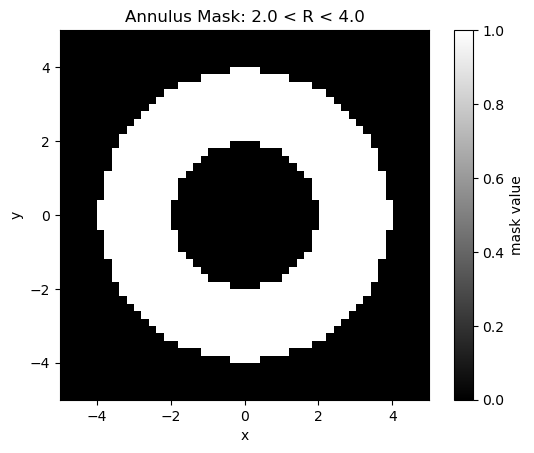

In [5]:
# 1) Coordinate vectors
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

# 2) 2D grids
X, Y = np.meshgrid(x, y, indexing="xy")

# 3) Distance from origin (broadcasting)
R = np.sqrt(X**2 + Y**2)

# 4) Target mask initialized to zeros
target_mask = np.zeros_like(R, dtype=int)

# 5) Annulus: 2.0 < R < 4.0  
mask = (R > 2.0) & (R < 4.0)
target_mask[mask] = 1

# 6) Visualize
plt.imshow(target_mask, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='gray', interpolation='nearest')
plt.title("Annulus Mask: 2.0 < R < 4.0")
plt.xlabel("x"); plt.ylabel("y")
plt.colorbar(label="mask value")
plt.show()

### Problem 4: Combined Processing Pipeline

You are processing sensor data stored in a 3D array of shape `(timesteps, sensors, measurements)`. You need to apply calibration, flag invalid data, and then extract readings from a specific set of critical sensors.

**Your Task:**

1.  Create a 3D array `raw_data` of shape `(50, 8, 3)` with random float values from -1.0 to 10.0. This represents 50 timesteps for 8 sensors, with 3 measurements each.
2.  **Broadcasting:** Create a 1D `calibration_factors` array of shape `(8,)` with random values. Multiply `raw_data` by these factors. Each sensor's data across all timesteps and measurements should be multiplied by its corresponding factor. You will need to use `np.newaxis` to align the arrays for broadcasting. Store the result in `calibrated_data`.
3.  **Masked Indexing:** In `calibrated_data`, any negative values are considered errors. Use a boolean mask to replace all negative values with `0`.
4.  **Special Indexing:** You are given a list of critical sensors, `critical_sensors = np.array([1, 3, 7])`. Use this array to extract all data (all timesteps and all measurements) for only these sensors. Store this in `final_data`.
5.  Print the shapes of `raw_data`, `calibrated_data`, and `final_data` to confirm each step was successful.

In [ ]:
raw_data = np.random.uniform(-1.0, 10.0, size=(50, 8, 3))

# 2) Broadcasting calibration per sensor
calibration_factors = np.random.uniform(0.5, 1.5, size=(8,))  # example range
calibrated_data = raw_data * calibration_factors[np.newaxis, :, np.newaxis]

# 3) Masked indexing: negatives → 0
neg_mask = calibrated_data < 0
calibrated_data[neg_mask] = 0.0

# 4) Special indexing: pick only critical sensors
critical_sensors = np.array([1, 3, 7])
final_data = calibrated_data[:, critical_sensors, :]

# 5) Confirm shapes
print("raw_data shape       :", raw_data.shape)        
print("calibrated_data shape:", calibrated_data.shape) 
print("final_data shape     :", final_data.shape)       

raw_data shape       : (50, 8, 3)
calibrated_data shape: (50, 8, 3)
final_data shape     : (50, 3, 3)


: 

### Problem 5: Creating and Customizing a Contour Plot

You need to visualize a **2D mathematical function** that represents a wave pattern originating from a single point.

---

### **Your Task**

1. **Create coordinate arrays:**  
    - Generate 1D arrays for `x` and `y` coordinates from **-10 to 10** with **200 points** using `np.linspace`.

2. **Create a meshgrid:**  
    - Use `np.meshgrid` to create 2D coordinate grids `X` and `Y`.

3. **Calculate distance from origin:**  
    - Compute a 2D array `R` representing the distance of each point `(X, Y)` from the origin `(0, 0)`.  
      - Formula: `R = sqrt(X^2 + Y^2)`

4. **Compute the wave function:**  
    - Calculate `Z = np.sin(R) / R` over the grid.
    - Handle the division-by-zero warning at the origin by replacing `nan` values in `Z` with `1` (the limit of `sin(x)/x` as `x → 0`).

5. **Visualize with contour plots:**  
    - Use `matplotlib.pyplot.contourf()` to create a **filled contour plot** of `Z` with **20 levels**.
    - Overlay with `plt.contour()` to draw **black contour lines**.

6. **Enhance the plot:**  
    - Add a **title** and a **color bar** to the plot for clarity.


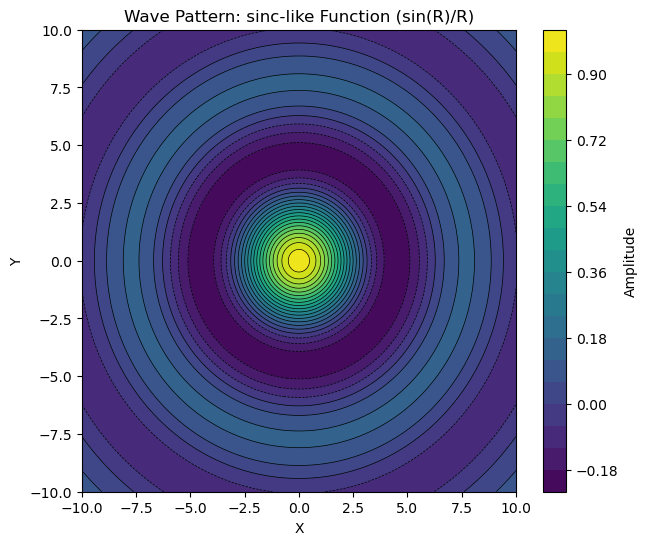

In [14]:
# 1. Create coordinate arrays
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

# 2. Create meshgrid
X, Y = np.meshgrid(x, y)

# 3. Distance from origin
R = np.sqrt(X**2 + Y**2)

# 4. Wave function Z = sin(R)/R, with limit at R=0 handled
Z = np.sin(R) / R
Z[np.isnan(Z)] = 1.0   # replace NaN at origin with 1

# 5. Filled contour plot with contour lines
plt.figure(figsize=(7, 6))
contour_filled = plt.contourf(X, Y, Z, levels=20, cmap="viridis")
contour_lines = plt.contour(X, Y, Z, levels=20, colors="black", linewidths=0.5)

# 6. Enhancements
plt.title("Wave Pattern: sinc-like Function (sin(R)/R)")
plt.colorbar(contour_filled, label="Amplitude")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()